In [1]:
import pandas as pd
import numpy as np
from time import time
from poloniex import Poloniex
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


In [2]:
# make an instance of poloniex.Poloniex
polo = Poloniex()

In [3]:
api = Poloniex(jsonNums=float)

#raw = api.returnChartData('BTC_LTC', period=api.DAY, start=time()-api.YEAR*10)
#raw = api.returnChartData('BTC_LTC', period=300, start=time()-api.MONTH*3)
raw = api.returnChartData('BTC_ETH', period=api.DAY, start=time()-api.YEAR*10)
df = pd.DataFrame(raw)

In [4]:
# adjust dates format and set dates as index
df['date'] = pd.to_datetime(df["date"], unit='s')
#df.set_index('date', inplace=True)

In [5]:
df.shape

(1781, 8)

In [6]:
df.tail()

,close,date,high,low,open,quoteVolume,volume,weightedAverage
1776,0.024634,2020-06-18,0.024839,0.024439,0.024704,5816.328365,143.594069,0.024688
1777,0.024586,2020-06-19,0.024707,0.024390,0.024639,8575.096843,210.680910,0.024569
1778,0.024454,2020-06-20,0.024716,0.024402,0.024586,4169.450438,102.333303,0.024544
1779,0.024522,2020-06-21,0.024646,0.024430,0.024464,3231.583476,79.343960,0.024553
1780,0.025151,2020-06-22,0.025161,0.024514,0.024522,4837.736731,120.576801,0.024924


In [7]:
etherium = df.copy()

In [8]:
etherium.drop(['high', 'low', 'open','quoteVolume', 'volume', 'weightedAverage'], axis=1, inplace=True)

In [9]:
etherium.tail()

,close,date
1776,0.024634,2020-06-18
1777,0.024586,2020-06-19
1778,0.024454,2020-06-20
1779,0.024522,2020-06-21
1780,0.025151,2020-06-22


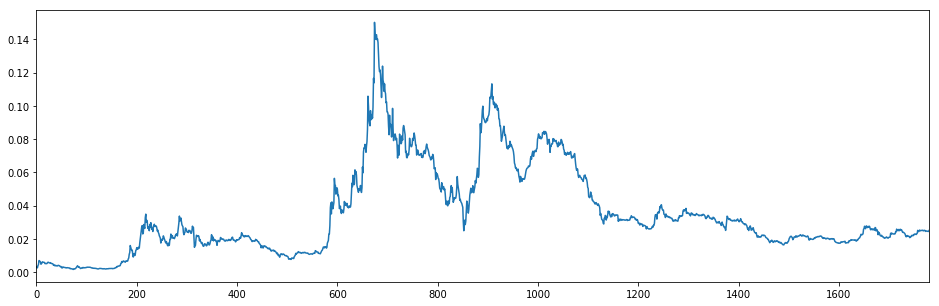

In [10]:
etherium['close'].plot(figsize=(16,5));

In [11]:
etherium.shape

(1781, 2)

In [50]:
train, test = etherium.iloc[0:-20, :], etherium.iloc[-20:, :]

In [51]:
train.shape, test.shape

((1761, 2), (20, 2))

In [52]:
preco_real = []
previsores = []

In [53]:
for i in range(90 , train.shape[0]):
    previsores.append(train.iloc[i-90:i, 0])
    preco_real.append(train.iloc[i, 0])

In [54]:
previsores, preco_real = np.array(previsores), np.array(preco_real)

In [55]:
previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1))

In [56]:
previsores.shape

(1671, 90, 1)

In [57]:
regressor = Sequential()

In [58]:
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (previsores.shape[1], 1)))
regressor.add(Dropout(0.3))

In [59]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

In [60]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

In [61]:
regressor.add(Dense(units = 1, activation = 'linear'))

In [62]:
regressor.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [63]:
regressor.fit(previsores, preco_real, epochs=100, batch_size=32)

Epoch 1/100
1671/1671 [==============================] - 9s 6ms/step - loss: 4.0583e-04 - mean_absolute_error: 0.0143
Epoch 2/100
1671/1671 [==============================] - 9s 5ms/step - loss: 2.1383e-04 - mean_absolute_error: 0.0115
Epoch 3/100
1671/1671 [==============================] - 9s 6ms/step - loss: 1.5045e-04 - mean_absolute_error: 0.0091
Epoch 4/100
1671/1671 [==============================] - 9s 5ms/step - loss: 1.3331e-04 - mean_absolute_error: 0.0087
Epoch 5/100
1671/1671 [==============================] - 9s 5ms/step - loss: 1.2265e-04 - mean_absolute_error: 0.0084
Epoch 6/100
1671/1671 [==============================] - 9s 5ms/step - loss: 1.1271e-04 - mean_absolute_error: 0.0081
Epoch 7/100
1671/1671 [==============================] - 9s 5ms/step - loss: 9.7695e-05 - mean_absolute_error: 0.0077
Epoch 8/100
1671/1671 [==============================] - 9s 5ms/step - loss: 9.1836e-05 - mean_absolute_error: 0.0070
Epoch 9/100
1671/1671 [==============================] -

1671/1671 [==============================] - 7s 4ms/step - loss: 3.0078e-05 - mean_absolute_error: 0.0040
Epoch 70/100
1671/1671 [==============================] - 9s 5ms/step - loss: 2.7659e-05 - mean_absolute_error: 0.0040
Epoch 71/100
1671/1671 [==============================] - 7s 4ms/step - loss: 3.1171e-05 - mean_absolute_error: 0.0041
Epoch 72/100
1671/1671 [==============================] - 7s 4ms/step - loss: 3.1152e-05 - mean_absolute_error: 0.0040
Epoch 73/100
1671/1671 [==============================] - 8s 5ms/step - loss: 3.0693e-05 - mean_absolute_error: 0.0040
Epoch 74/100
1671/1671 [==============================] - 9s 5ms/step - loss: 3.2762e-05 - mean_absolute_error: 0.0040
Epoch 75/100
1671/1671 [==============================] - 9s 5ms/step - loss: 2.8222e-05 - mean_absolute_error: 0.0039
Epoch 76/100
1671/1671 [==============================] - 9s 5ms/step - loss: 3.0272e-05 - mean_absolute_error: 0.0040
Epoch 77/100
1671/1671 [==============================] - 9s 

In [64]:
entradas = etherium.loc[len(etherium)-len(test)-90:]

In [65]:
entradas.head()

,close,date
1671,0.025208,2020-03-05
1672,0.026830,2020-03-06
1673,0.026698,2020-03-07
1674,0.024781,2020-03-08
1675,0.025572,2020-03-09


In [66]:
entradas.shape

(110, 2)

In [67]:
x_test = []

In [68]:
for i in range(90 , entradas.shape[0]):
    x_test.append(entradas.iloc[i-90:i, 0])

In [69]:
x_test = np.array(x_test)

In [70]:
x_test.shape

(20, 90)

In [71]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [72]:
x_test.shape

(20, 90, 1)

In [73]:
previsoes = regressor.predict(x_test)

In [74]:
previsoes

array([[0.02443696],
       [0.02475672],
       [0.02480948],
       [0.02476284],
       [0.02476922],
       [0.02482983],
       [0.02492705],
       [0.02487784],
       [0.024841  ],
       [0.02472702],
       [0.02474835],
       [0.02482611],
       [0.02473009],
       [0.02445319],
       [0.02434247],
       [0.02436234],
       [0.02436842],
       [0.02432721],
       [0.02422435],
       [0.02417654]], dtype=float32)

In [75]:
test.head(20)

,close,date
1761,0.025313,2020-06-03
1762,0.024847,2020-06-04
1763,0.024942,2020-06-05
1764,0.025038,2020-06-06
1765,0.025094,2020-06-07
1766,0.025205,2020-06-08
1767,0.024964,2020-06-09
1768,0.025086,2020-06-10
1769,0.024845,2020-06-11
1770,0.025110,2020-06-12
